In [1]:
# Bibliotecas
import os
import pandas as pd
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from matplotlib.colors import ListedColormap
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import polars as pl


In [2]:

# diretorio = 'data'
# file_pattern = os.path.join(diretorio, "*_TOTALS*.txt")

# # Find all files that match the pattern
# file_list = glob.glob(file_pattern)

# # Initialize an empty list to store dataframes
# dfs = []

# for arquivo in file_list:
#     year = arquivo.split("_TOTALS")[0].split("_")[-1]
#     df = pd.read_csv(arquivo, delimiter=';', skiprows=2)
#     df.columns = df.columns.str.replace(r'\d+', '', regex=True)
#     df['year'] = year
#     dfs.append(df)

# # Concatenate all dataframes in the list
# df_final = pd.concat(dfs, ignore_index=True)

# # Filter data for the year 2021
# emission_data = df_final[df_final['year'] == "2021"]


In [3]:
diretorio = 'data'
# Create a list of DataFrames to concatenate later
dfs = []
for arquivo in os.listdir(diretorio):
    if arquivo.endswith(".txt") and "_TOTALS" in arquivo:
        year = arquivo.split("_TOTALS")[0].split("_")[-1]
        caminho_arquivo = os.path.join(diretorio, arquivo)
        df = pl.read_csv(caminho_arquivo, separator=';', skip_rows=2)
        df.columns = list(map(lambda x: ''.join(filter(str.isalpha, x)), df.columns))
        df = df.with_columns(pl.lit(year).alias("year"))
        dfs.append(df)

# Concatenate all DataFrames in the list
df_final = pl.concat(dfs)
df_polars = df_final.filter(pl.col("year") == "2021")
emission_data = df_polars.to_pandas()

In [4]:
geometry = [Point(xy) for xy in zip(emission_data['lon'], emission_data['lat'])]
geodata = gpd.GeoDataFrame(emission_data, crs="EPSG:4326", geometry=geometry)

In [5]:
color_config = ['#420a68', '#6a176e', '#932667',  '#bc3754', '#dd513a', '#f37819', '#fca50a', '#f6d746','#fcffa4', '#ffffff']

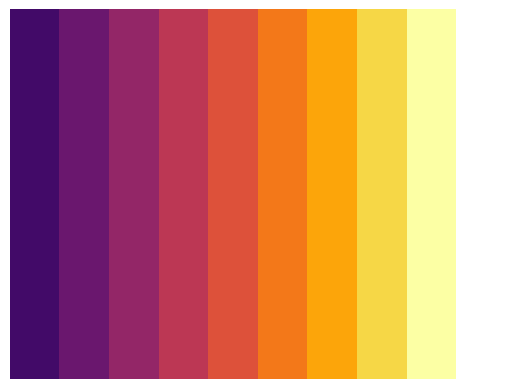

In [15]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy as np

newcolors = color_config
# black = np.array([0.0, 0.0, 0.0, 1.0])

our_cmap = ListedColormap(newcolors)
bounds = [0.0, 0.06, 6, 60, 600, 3000, 6000, 24000, 45000, 120000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

gradient = np.linspace(0, 1, 10)
gradient = np.vstack((gradient, gradient))
plt.imshow(gradient, aspect='auto', cmap=our_cmap)
plt.axis('off')
plt.show()

In [7]:
# import os
# import polars as pl
# import geopandas as gpd
# from shapely.geometry import Point

# diretorio = 'data'

# # Create a list of DataFrames to concatenate later
# dfs = []
# for arquivo in os.listdir(diretorio):
#     if arquivo.endswith(".txt") and "_TOTALS" in arquivo:
#         year = arquivo.split("_TOTALS")[0].split("_")[-1]
#         caminho_arquivo = os.path.join(diretorio, arquivo)
#         df = pl.read_csv(caminho_arquivo, separator=';', skip_rows=2)
#         df.columns = list(map(lambda x: ''.join(filter(str.isalpha, x)), df.columns))
#         df = df.with_columns(pl.lit(year).alias("year"))
#         emission_data = df.to_pandas()

#         geometry = [Point(xy) for xy in zip(emission_data['lon'], emission_data['lat'])]
#         geodata = gpd.GeoDataFrame(emission_data, crs="EPSG:4326", geometry=geometry)




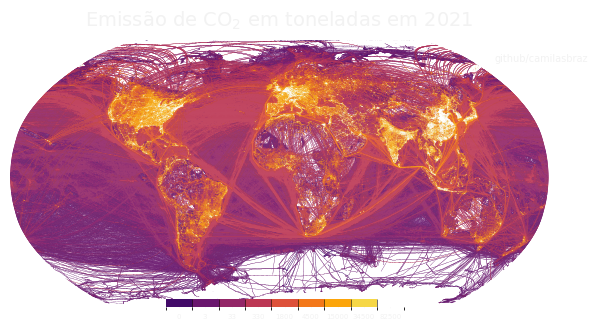

In [13]:
fig, ax = plt.subplots(facecolor='none', subplot_kw={'projection': ccrs.Robinson()})
ax.patch.set_facecolor('none')
fig.set_size_inches(7, 3.5)


ax = geodata.plot(ax=ax, column='emissiontons', transform=ccrs.PlateCarree(),
                  cmap=our_cmap, norm=norm, s=0.05, alpha=1, edgecolors='none')
year = "2021"
ax.set_title(f"Emissão de CO$_2$ em toneladas em {year}", fontsize=14, color='#f2f2f2')

plt.setp(ax.spines.values(), color='none')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

# Limites dos eixos
ax.set_ylim(-8000000, 9000000)



text_annotation = ax.text(0.9, 0.9, "github/camilasbraz",
                          size=7,
                          color='#f2f2f2',
                          transform=ax.transAxes)
# text_annotation = ax.annotate(
#     f"Emissão em toneladas de CO$_2$ em {year}",
#     (0.5, 20),  
#     size=15,
#     color='#f2f2f2',
#     transform=ax.transAxes,
#     ha='center',  # Centralize horizontalmente também
# )


# Adicionar a escala
colorbar_axes = fig.add_axes([0.35, 0.1, 0.34, 0.025])
sm = plt.cm.ScalarMappable(cmap=our_cmap, norm=norm)
sm._A = []
colorbar = fig.colorbar(sm, cax=colorbar_axes, orientation="horizontal", pad=0.2, format='%.0f', 
                  ticks=[0.03, 3, 33, 330, 1800, 4500, 15000, 34500, 82500],
                  drawedges=True)
colorbar.outline.set_visible(False)
colorbar.ax.tick_params(labelsize=5, width=0.5, length=0.5, color='#f2f2f2') # Aumente o tamanho da fonte dos rótulos
colorbar_tick_labels = plt.getp(colorbar.ax, 'xticklabels')  # Define a cor dos rótulos
plt.setp(colorbar_tick_labels, color='#f2f2f2')
#colorbar.ax.set_xlabel('Toneladas de CO$_2$ emitido', fontsize=8, color='#f    2f2f2', labelpad=-16) # Aumente o tamanho da fonte do rótulo

plt.show()

In [14]:
fig.savefig('config_teste_escala2.png', dpi=300, bbox_inches='tight')



In [17]:
fig.savefig(f'maps/co2_mao_{year}', dpi=1200, bbox_inches='tight')

In [ ]:
# image_format = 'svg' 
# image_name = 'MAP.svg'
# fig.savefig(image_name, format=image_format, dpi=1200)